In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pympc.geometry.polytope import Polytope
from pympc.geometry.inner_approximation_polytope_projection import InnerApproximationOfPolytopeProjection, point_in_convex_hull, separating_hyperplane_of_maximum_alignment

False


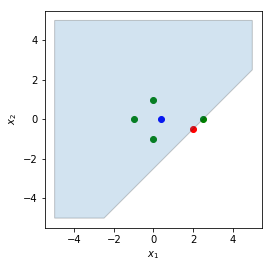

[[ 0.70710678]
 [-0.70710678]] [[ 1.76776606]]
[[ 0.95577901]
 [-0.29408585]]


In [3]:
points = [np.random.randn(2, 1) for i in range(5)]
points = [np.array([[0.],[1.]]), np.array([[2.5],[0.]]), np.array([[-1.],[0.]]), np.array([[0.],[-1.]])]
x = np.random.randn(2, 1)
x = np.array([[2.],[-0.5]])
plt.scatter(x[0,0], x[1,0], color='r')
for v in points:
    plt.scatter(v[0,0], v[1,0], color='g')
print point_in_convex_hull(x, points)
a, b, c = separating_hyperplane_of_maximum_alignment(x, points)
plt.scatter(c[0,0], c[1,0], color='b')
M = max([np.max(v) for v in points])
m = min([np.min(v) for v in points])
M = max([M, -m])*2.
p = Polytope.from_bounds(-np.ones((2,1))*M, np.ones((2,1))*M)
p.add_facets(a.T, b)
p.assemble()
p.plot(alpha=.2)
plt.axes().set_aspect('equal')
plt.show()
print a, b
print (x - c)/np.linalg.norm(x-c)

In [ ]:
n_var = 5
n_cons = 200
A = np.random.randn(n_cons, n_var)
b = np.random.rand(n_cons, 1)
poly = Polytope(A, b)
poly.assemble()

<pympc.geometry.polytope.Polytope instance at 0x112bb97a0>

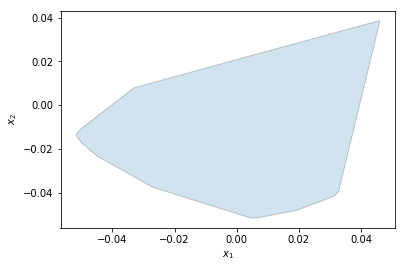

x =0.
y =0.


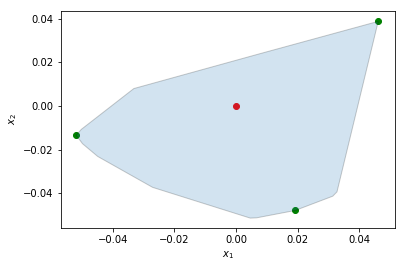

x =0.
y =-.04


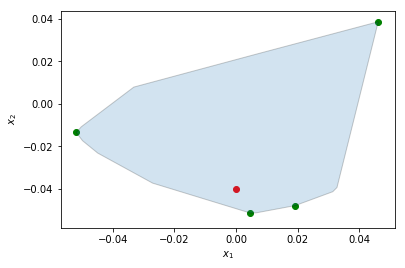

x =0.
y =-.045


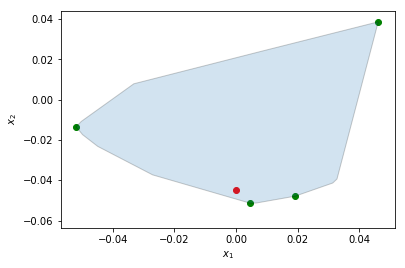

x =0.
y =-.048


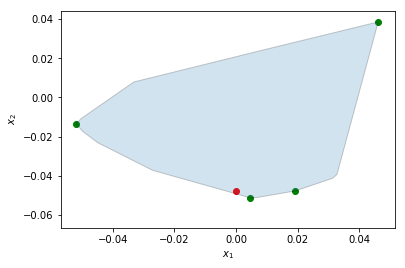

In [ ]:
poly.plot(alpha=.2)
plt.show()
app = InnerApproximationOfPolytopeProjection(A, b, [0,1])
for i in range(10):
    x = input("x =")
    y = input("y =")
    app.include_point(np.array([[x],[y]]))
    plt.scatter(x, y, color='r')
    for v in app.vertices:
        plt.scatter(v[0,0], v[1,0], color='g')
    poly.plot(alpha=.2)
    plt.show()